# Actividad Grupal | Programación Científica y HPC | Grupo 21

- Allan Josué González Villalobos
- William Enrique Guevara Zavala

Se inicia haciendo la importación de las librerías necesarias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate, lagrange
from scipy.optimize import newton
from scipy.interpolate import CubicSpline
import time
from numpy.polynomial.chebyshev import Chebyshev

Definiendo las funciones a analizar

In [2]:
# Definición de funciones
def f1(x):
    return np.sin(x)

def f2(x):
    return 1 / (1 + 25 * x**2)

def f3(x):
    return np.exp(-20 * x**2)

Funciones de interpolación

In [3]:
def interpolate_polynomial(nodes, values, method):
    """
    Genera una función interpoladora basada en los nodos y valores dados, utilizando el método especificado.

    Parámetros:
    - nodes (array): Nodos de interpolación.
    - values (array): Valores correspondientes a los nodos.
    - method (str): Método de interpolación deseado ("barycentric", "lagrange" o "newton").

    Retorna:
    - interpolator (function): Función interpoladora generada según el método seleccionado.
    """
    # Selecciona el método de interpolación
    if method == "barycentric":
        interpolator = lambda x: barycentric_interpolate(nodes, values, x)
    elif method == "lagrange":
        interpolator = lagrange(nodes, values)
    elif method == "newton":
        interpolator = newton_interpolate(nodes, values)
    else:
        raise ValueError("Invalid interpolation method")
    
    return interpolator

Función de interpolaciones divididas de Newton

In [4]:
def newton_interpolate(nodes, values):
    '''
    Retorna una función que permite interpolar los valores utilizando el método de interpolación de Newton.
    
    Parámetros:
    - nodes (array): Nodos de interpolación.
    - values (array): Valores correspondientes a los nodos.

    Retorna:
    - interpolating_polynomial (function): Función que interpola los valores.
    '''
    # Obtiene la cantidad de nodos
    n = len(nodes)
    
    # Inicializa el arreglo de coeficientes
    coeffs = np.zeros(n)
    coeffs[0] = values[0]

    # Calcula los coeficientes del polinomio interpolante
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            values[i] = (values[i] - values[i-1]) / (nodes[i] - nodes[i-j])
        coeffs[j] = values[j]

    # Define la función del polinomio interpolante
    def interpolating_polynomial(x):
        result = coeffs[-1]
        for i in range(n-2, -1, -1):
            result = result * (x - nodes[i]) + coeffs[i]
        return result

    return interpolating_polynomial

Función para cálculo de errores

In [5]:
def calculate_error(true_values, interpolated_values):
    '''
    Calcula el error absoluto entre los valores reales y los valores interpolados.

    Parámetros:
    - true_values (array): Valores reales.
    - interpolated_values (array): Valores interpolados.

    Retorna:
    - error (array): Error absoluto entre los valores reales y interpolados.
    '''
    # Calcula el error absoluto
    error = np.abs(true_values - interpolated_values)
    
    return error

Función para graficar interpolaciones

In [6]:
def plot_interpolation(true_values, interpolated_values, nodes, title):
    '''
    Grafica la función real, la función interpolada y los nodos de interpolación.

    Parámetros:
    - true_values (array): Valores reales de la función.
    - interpolated_values (array): Valores interpolados de la función.
    - nodes (array): Nodos de interpolación.
    - title (str): Título del gráfico.
    '''
    # Grafica la función real con los nodos
    plt.plot(nodes, true_values, label='True Function', marker='o')

    # Grafica la función interpolada
    plt.plot(nodes, interpolated_values, label='Interpolated Polynomial')

    # Configuración del gráfico
    plt.title(title)
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    
    # Muestra el gráfico
    plt.show()

Definición de nodos. Estos dos comandos generan nodos de Chebyshev para la interpolación. Los nodos de Chebyshev son puntos específicos que maximizan la precisión de la interpolación polinómica. En este caso, se están generando nodos de Chebyshev para polinomios de grado 11 y 21.

In [7]:
# Generar nodos utilizando polinomios de Chebyshev
cheb_nodes_11 = Chebyshev.basis(11).roots()
cheb_nodes_21 = Chebyshev.basis(21).roots()

 En este bloque, se definen nodos equiespaciados y nodos de Chebyshev para dos conjuntos diferentes. ```nodes_11_equidistant``` y ```nodes_21_equidistant``` son nodos equiespaciados en el intervalo de $0$ a $2\pi$, generados utilizando ```np.linspace```. ```nodes_11_chebyshev``` y ```nodes_21_chebyshev``` son nodos de Chebyshev para los polinomios de grado $11$ y $21$ respectivamente, escalados por $\pi$.

In [8]:
# Definición de nodos
nodes_11_equidistant = np.linspace(-np.pi, np.pi, 11)
nodes_21_equidistant = np.linspace(-np.pi,np.pi, 21)
nodes_11_chebyshev = cheb_nodes_11*np.pi
nodes_21_chebyshev = cheb_nodes_21*np.pi

# Tarea 1

Function: Function 1, Method: barycentric, Nodes: equidistant (11 nodes)
Error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Elapsed Time: 0.005643367767333984


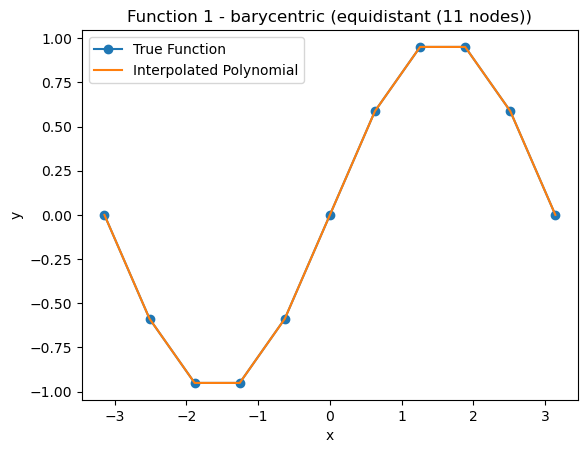

Function: Function 1, Method: lagrange, Nodes: equidistant (11 nodes)
Error: [2.55683393e-12 6.46815934e-13 1.16906484e-13 1.17683641e-14
 4.44089210e-16 0.00000000e+00 2.22044605e-16 1.22124533e-15
 2.33146835e-15 1.14352972e-14 1.29277457e-13]
Elapsed Time: 0.004294395446777344


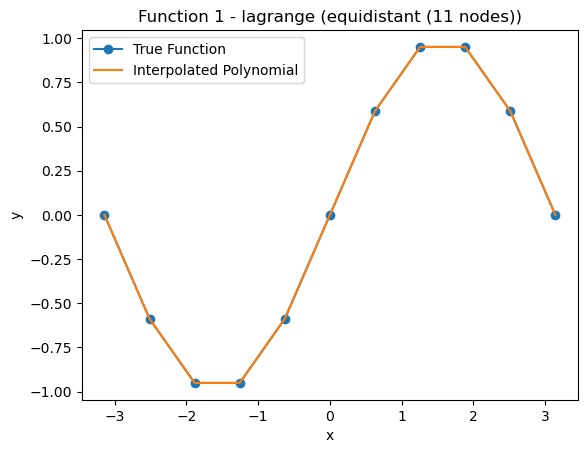

Function: Function 1, Method: newton, Nodes: equidistant (11 nodes)
Error: [0.00000000e+00 0.00000000e+00 1.11022302e-16 0.00000000e+00
 0.00000000e+00 1.22464680e-16 0.00000000e+00 1.11022302e-16
 1.33226763e-15 1.11022302e-16 2.44929360e-16]
Elapsed Time: 0.0


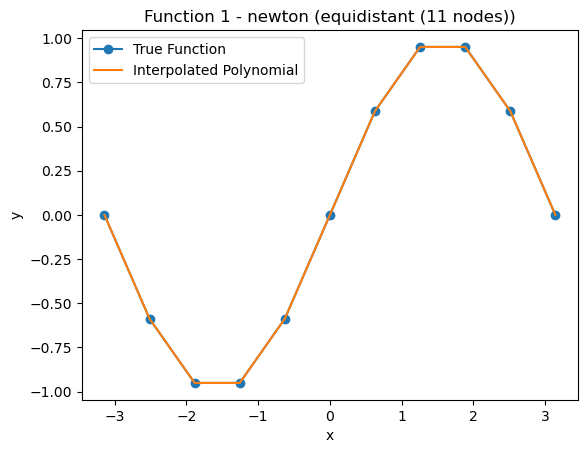

Function: Function 2, Method: barycentric, Nodes: equidistant (11 nodes)
Error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Elapsed Time: 0.0


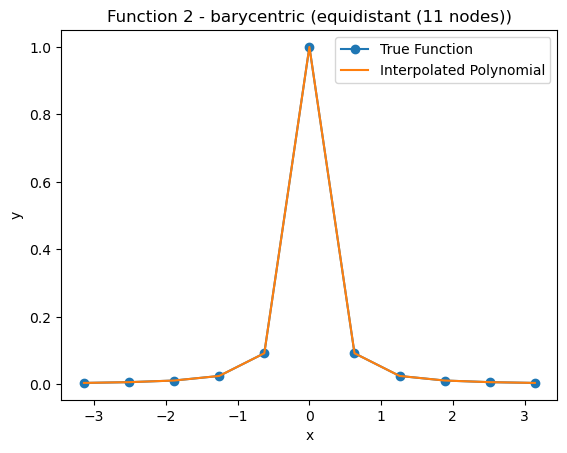

Function: Function 2, Method: lagrange, Nodes: equidistant (11 nodes)
Error: [2.94836031e-12 3.08555265e-13 2.71397488e-14 1.38569711e-14
 4.71844785e-16 0.00000000e+00 8.32667268e-17 1.79717352e-15
 1.78242837e-14 8.89531504e-14 3.26346589e-13]
Elapsed Time: 0.0


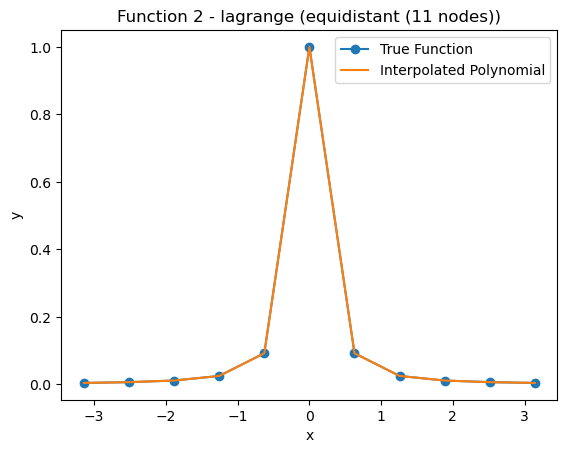

Function: Function 2, Method: newton, Nodes: equidistant (11 nodes)
Error: [0.00000000e+00 0.00000000e+00 1.73472348e-18 3.46944695e-18
 1.38777878e-17 0.00000000e+00 2.77555756e-17 6.21031004e-16
 3.22138149e-15 3.68125669e-14 9.87335214e-14]
Elapsed Time: 0.0


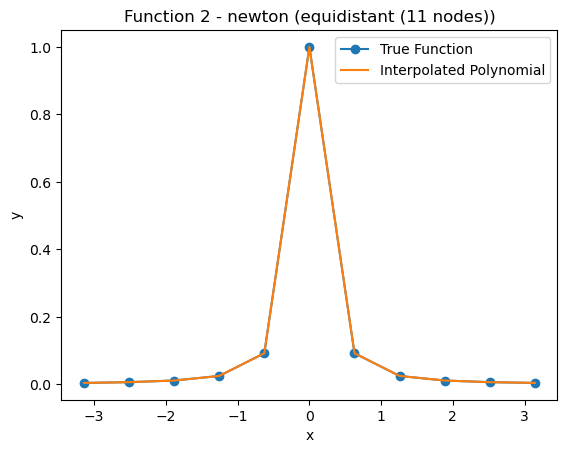

Function: Function 3, Method: barycentric, Nodes: equidistant (11 nodes)
Error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Elapsed Time: 0.0


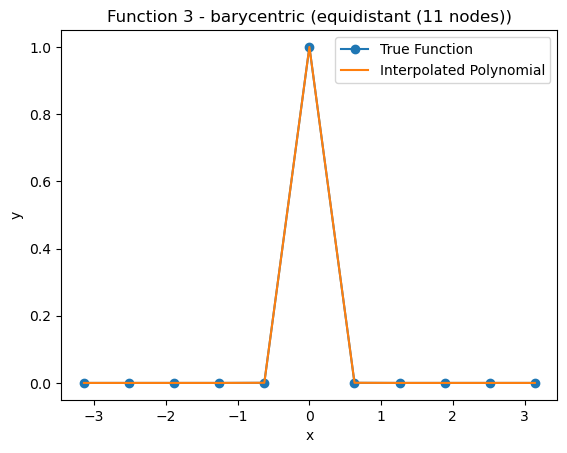

Function: Function 3, Method: lagrange, Nodes: equidistant (11 nodes)
Error: [2.75313106e-12 2.50244270e-13 4.15223411e-14 1.45588106e-14
 7.42895329e-16 0.00000000e+00 3.42607887e-17 1.09533402e-15
 9.65894031e-15 8.21565038e-15 8.28226376e-14]
Elapsed Time: 0.0


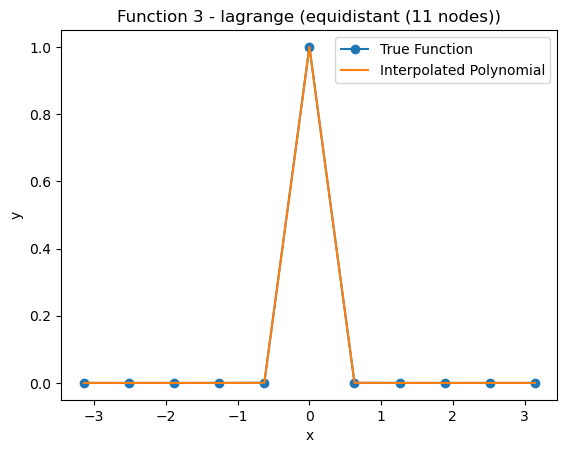

Function: Function 3, Method: newton, Nodes: equidistant (11 nodes)
Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.42101086e-20 0.00000000e+00 1.03866568e-16 4.30484581e-15
 1.31101101e-14 5.40983704e-14 8.87895527e-14]
Elapsed Time: 0.0


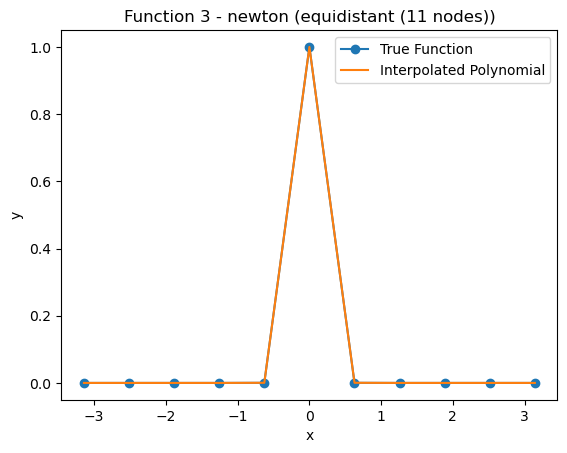

Function: Function 1, Method: barycentric, Nodes: equidistant (21 nodes)
Error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Elapsed Time: 0.0


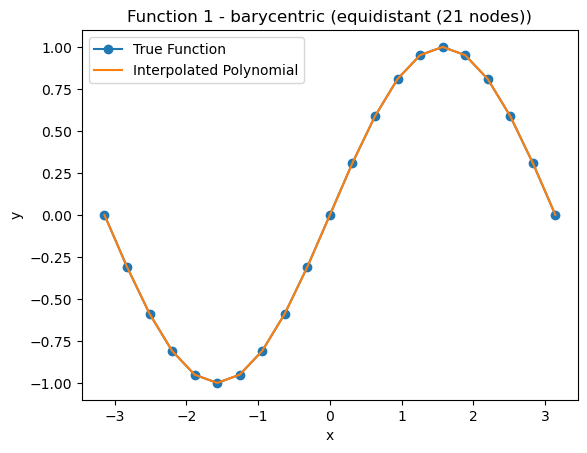

Function: Function 1, Method: lagrange, Nodes: equidistant (21 nodes)
Error: [1.47618435e-06 3.68145002e-07 8.09640008e-08 1.52441820e-08
 2.35238296e-09 2.77877943e-10 2.23775443e-11 9.88653603e-13
 1.83186799e-14 8.88178420e-16 0.00000000e+00 0.00000000e+00
 1.11022302e-16 5.55111512e-15 8.29336599e-14 7.14539539e-13
 3.97404332e-12 1.43504097e-11 2.74933409e-11 2.35396147e-11
 2.73683397e-10]
Elapsed Time: 0.01607823371887207


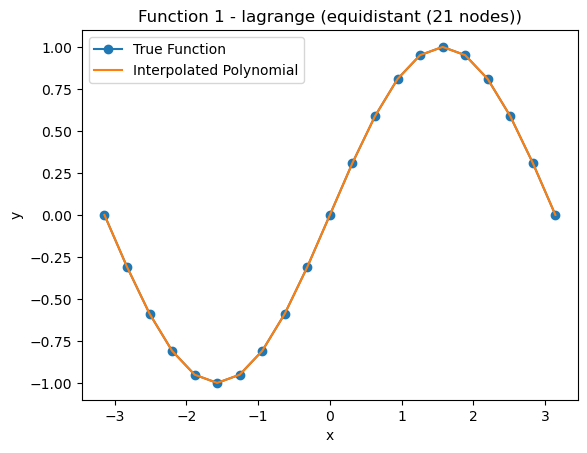

Function: Function 1, Method: newton, Nodes: equidistant (21 nodes)
Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16
 1.11022302e-16 0.00000000e+00 2.22044605e-16 2.22044605e-16
 2.22044605e-16 5.55111512e-17 1.22464680e-16 1.11022302e-16
 0.00000000e+00 7.77156117e-16 1.11022302e-16 1.33226763e-15
 8.88178420e-16 2.33146835e-15 2.66453526e-15 4.99600361e-15
 2.54536544e-15]
Elapsed Time: 0.0


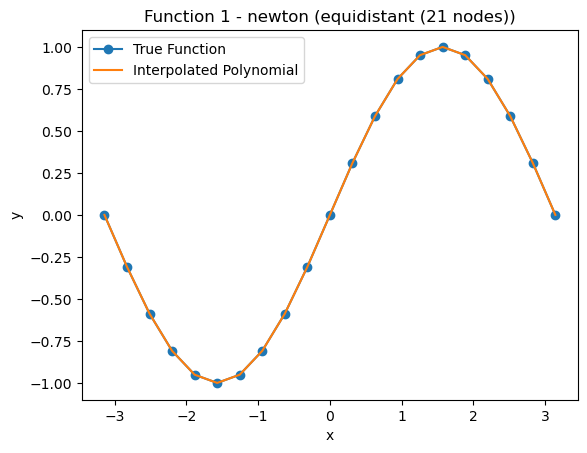

Function: Function 2, Method: barycentric, Nodes: equidistant (21 nodes)
Error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Elapsed Time: 0.0005524158477783203


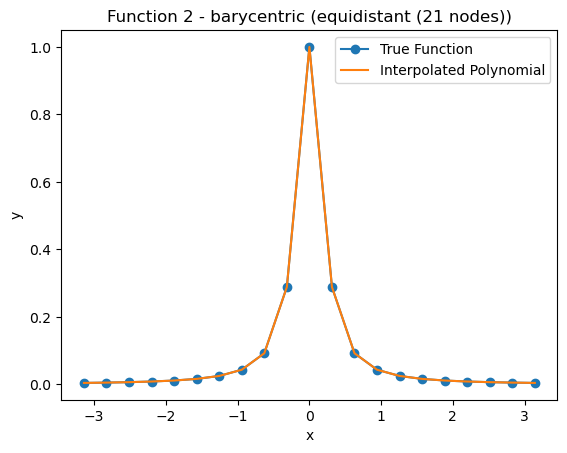

Function: Function 2, Method: lagrange, Nodes: equidistant (21 nodes)
Error: [1.09687012e-06 2.84139591e-07 6.37869785e-08 1.20047745e-08
 1.82453481e-09 2.09550696e-10 1.56851407e-11 2.84078316e-13
 8.26283486e-14 6.66133815e-15 0.00000000e+00 0.00000000e+00
 1.08246745e-15 5.80091530e-15 1.12666820e-13 1.32706346e-12
 9.93932193e-12 7.93661230e-11 6.12047055e-10 4.11890029e-09
 1.75989652e-08]
Elapsed Time: 0.005506038665771484


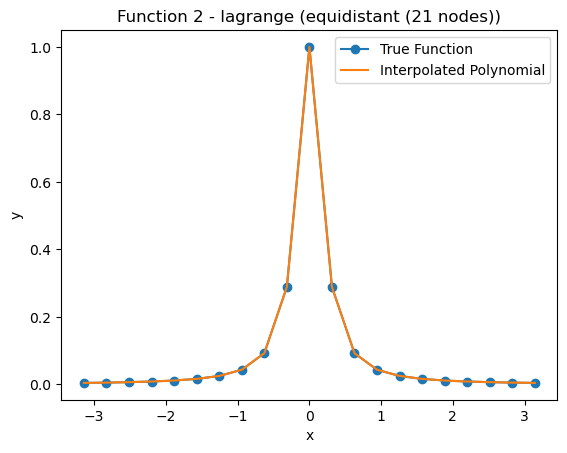

Function: Function 2, Method: newton, Nodes: equidistant (21 nodes)
Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.73472348e-18 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.77555756e-17 5.55111512e-17 2.22044605e-16 5.55111512e-16
 6.38378239e-16 1.82909243e-14 2.81389495e-13 3.58556934e-13
 1.11374451e-13 7.42568680e-12 2.08983137e-10 7.75149570e-10
 4.59279193e-09]
Elapsed Time: 0.0


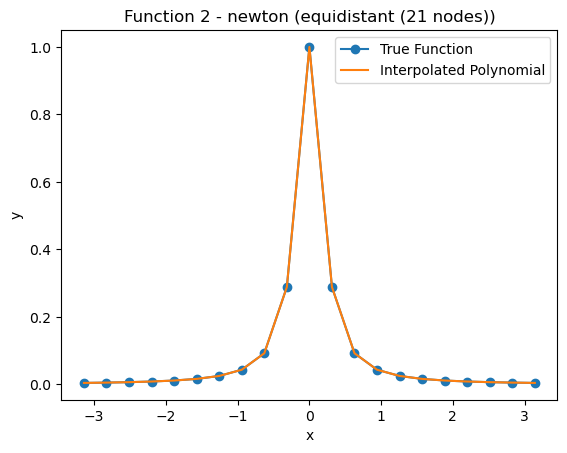

Function: Function 3, Method: barycentric, Nodes: equidistant (21 nodes)
Error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Elapsed Time: 0.0010526180267333984


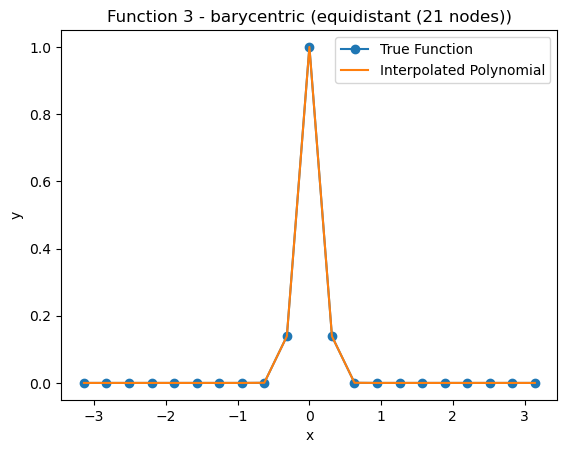

Function: Function 3, Method: lagrange, Nodes: equidistant (21 nodes)
Error: [1.38630782e-06 3.51417622e-07 7.77077169e-08 1.46004328e-08
 2.26162089e-09 2.72822653e-10 2.30160186e-11 9.04304365e-13
 5.17021322e-14 6.24500451e-15 0.00000000e+00 3.05311332e-16
 4.25310828e-15 3.88855172e-14 3.51814788e-13 3.16524584e-12
 2.20757856e-11 1.22989507e-10 5.14494891e-10 1.87224924e-09
 1.08409328e-08]
Elapsed Time: 0.015661239624023438


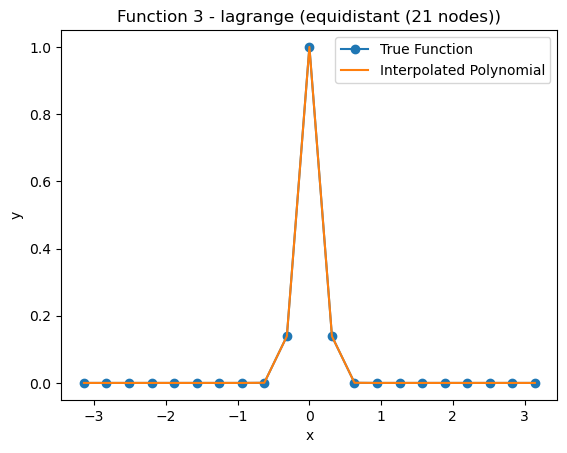

Function: Function 3, Method: newton, Nodes: equidistant (21 nodes)
Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.59309191e-58
 0.00000000e+00 9.40395481e-38 6.31088724e-30 3.30872245e-24
 1.08420217e-19 2.77555756e-17 2.22044605e-16 1.38777878e-16
 6.27980740e-15 8.06323651e-14 7.19664452e-13 3.18748999e-12
 2.07685852e-11 7.25733918e-11 4.04667545e-10 1.72077485e-09
 3.60437355e-09]
Elapsed Time: 0.0


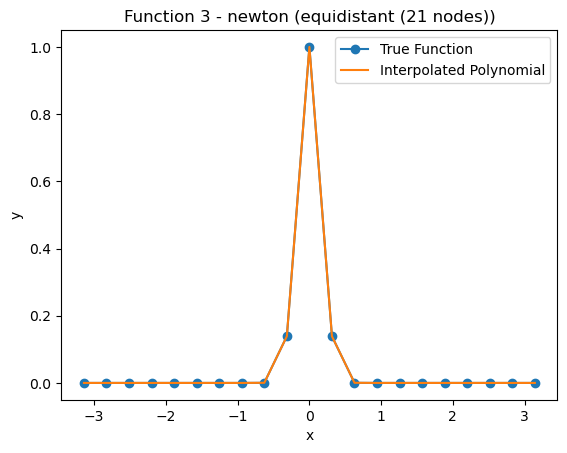

Function: Function 1, Method: barycentric, Nodes: Chebyshev (11 nodes)
Error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Elapsed Time: 0.0


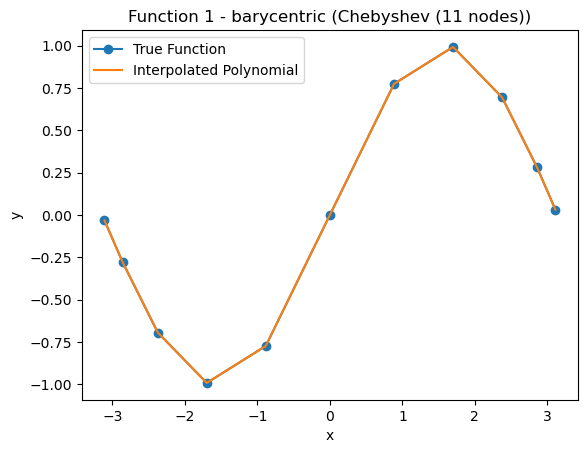

Function: Function 1, Method: lagrange, Nodes: Chebyshev (11 nodes)
Error: [1.59094959e-13 7.26640970e-14 7.88258347e-15 2.66453526e-15
 2.22044605e-16 2.46519033e-32 2.22044605e-16 5.55111512e-16
 3.77475828e-15 1.92068583e-14 3.76920717e-14]
Elapsed Time: 0.013035058975219727


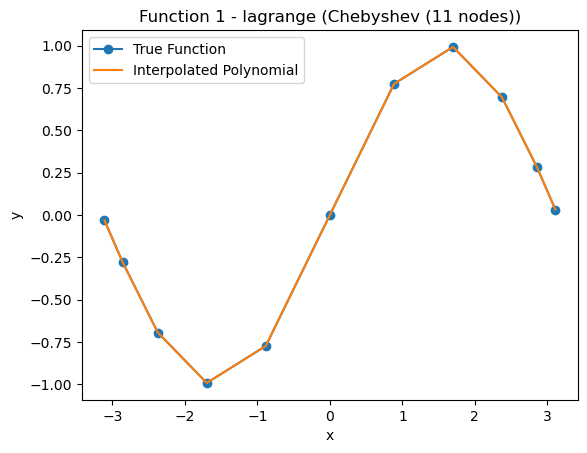

Function: Function 1, Method: newton, Nodes: Chebyshev (11 nodes)
Error: [0.00000000e+00 0.00000000e+00 1.11022302e-16 1.11022302e-16
 0.00000000e+00 1.66085708e-16 3.33066907e-16 9.99200722e-16
 5.55111512e-16 3.33066907e-16 4.02455846e-15]
Elapsed Time: 0.0


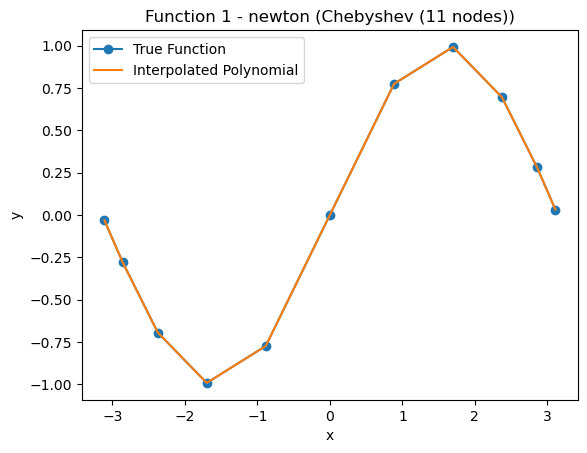

Function: Function 2, Method: barycentric, Nodes: Chebyshev (11 nodes)
Error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Elapsed Time: 0.0


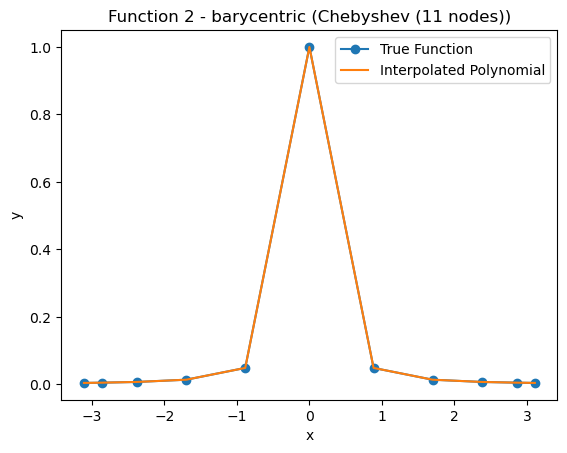

Function: Function 2, Method: lagrange, Nodes: Chebyshev (11 nodes)
Error: [7.98700515e-13 4.27559030e-13 1.28555153e-13 1.20996962e-14
 1.73472348e-16 2.22044605e-16 1.24900090e-16 4.64905892e-15
 1.91921132e-14 3.05415415e-14 3.17584500e-14]
Elapsed Time: 0.0


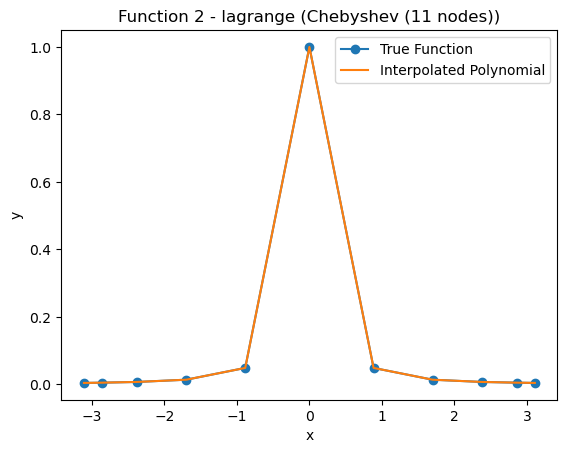

Function: Function 2, Method: newton, Nodes: Chebyshev (11 nodes)
Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.73472348e-18
 0.00000000e+00 2.22044605e-16 2.28983499e-16 2.02268757e-15
 9.47072282e-15 3.75090584e-14 1.58727198e-16]
Elapsed Time: 0.0


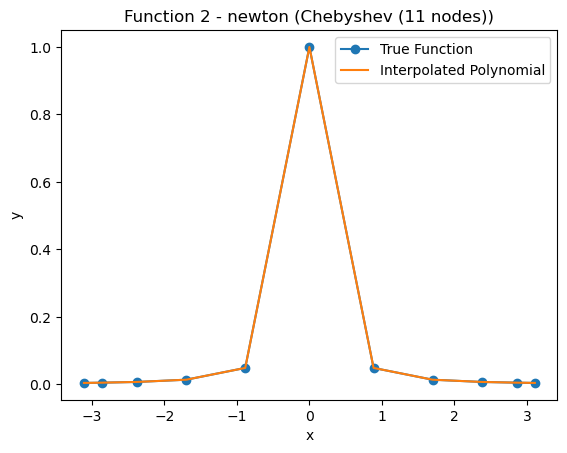

Function: Function 3, Method: barycentric, Nodes: Chebyshev (11 nodes)
Error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Elapsed Time: 0.0


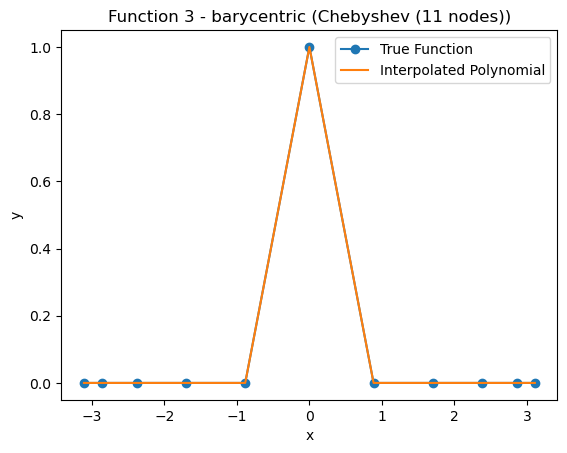

Function: Function 3, Method: lagrange, Nodes: Chebyshev (11 nodes)
Error: [7.43072270e-13 4.29545288e-13 1.14241949e-13 7.54951657e-15
 9.04379804e-16 2.22044605e-16 5.71308715e-16 2.66453526e-15
 2.22044605e-15 5.99520433e-15 3.48610030e-14]
Elapsed Time: 0.013534307479858398


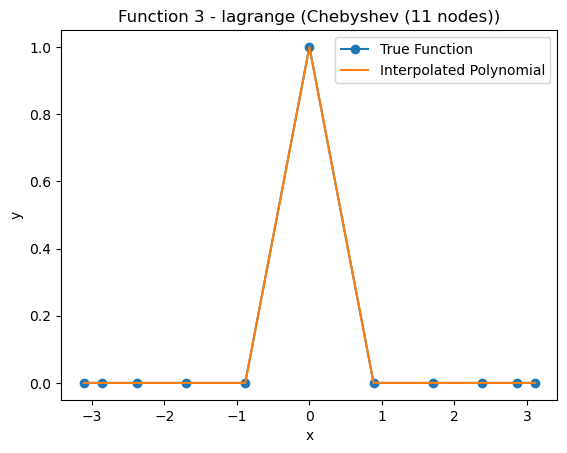

Function: Function 3, Method: newton, Nodes: Chebyshev (11 nodes)
Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.14794370e-41
 2.64697796e-23 2.22044605e-16 6.89482410e-16 5.71621080e-15
 8.54925046e-15 2.59132935e-14 8.98683148e-14]
Elapsed Time: 0.0045490264892578125


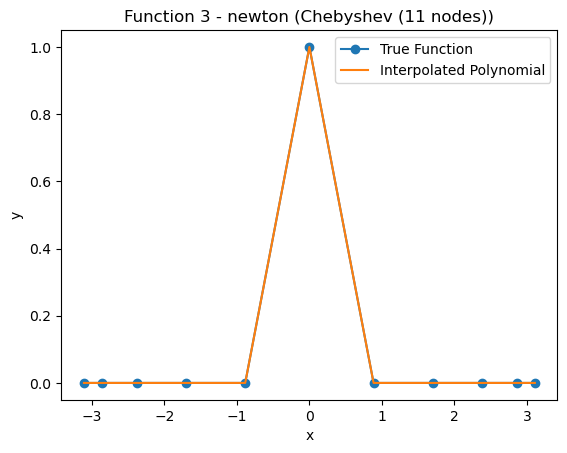

Function: Function 1, Method: barycentric, Nodes: Chebyshev (21 nodes)
Error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Elapsed Time: 0.0


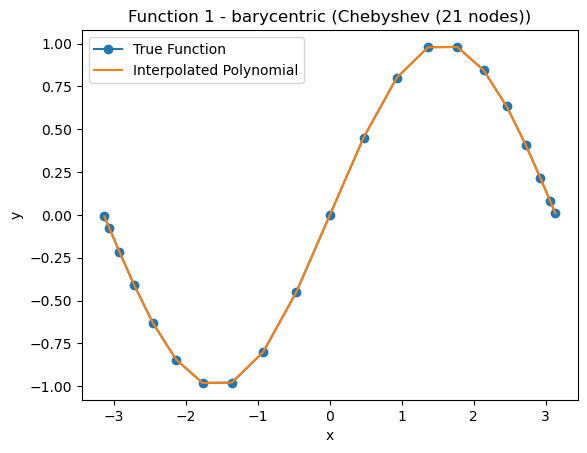

Function: Function 1, Method: lagrange, Nodes: Chebyshev (21 nodes)
Error: [6.02852129e-08 4.46888224e-08 2.41201479e-08 9.08892128e-09
 2.18875251e-09 2.63870481e-10 4.48885373e-12 4.75286477e-12
 3.68149955e-13 4.55191440e-15 9.86076132e-32 3.33066907e-16
 3.44169138e-15 4.30766534e-14 4.34430270e-13 3.17490478e-12
 1.58866253e-11 5.57149882e-11 1.40132295e-10 2.56818497e-10
 3.46675544e-10]
Elapsed Time: 0.008107900619506836


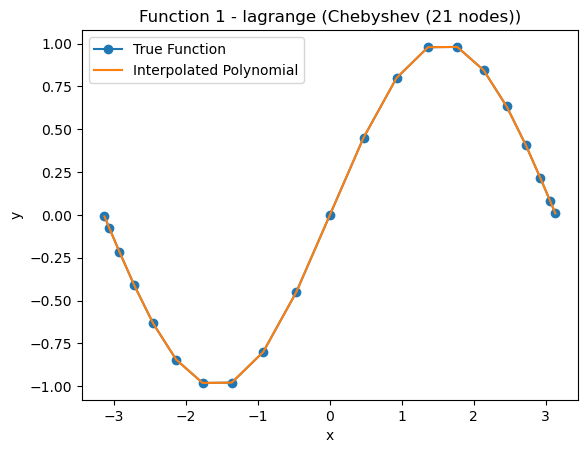

Function: Function 1, Method: newton, Nodes: Chebyshev (21 nodes)
Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 5.55111512e-17 6.93240545e-18 3.88578059e-16
 6.66133815e-16 1.88737914e-15 7.77156117e-16 5.55111512e-15
 1.44328993e-15 1.27675648e-15 7.91033905e-15 1.97064587e-15
 4.71150896e-15]
Elapsed Time: 0.0


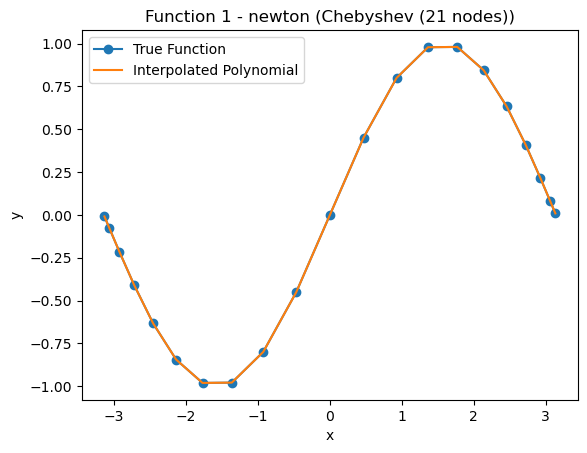

Function: Function 2, Method: barycentric, Nodes: Chebyshev (21 nodes)
Error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Elapsed Time: 0.0


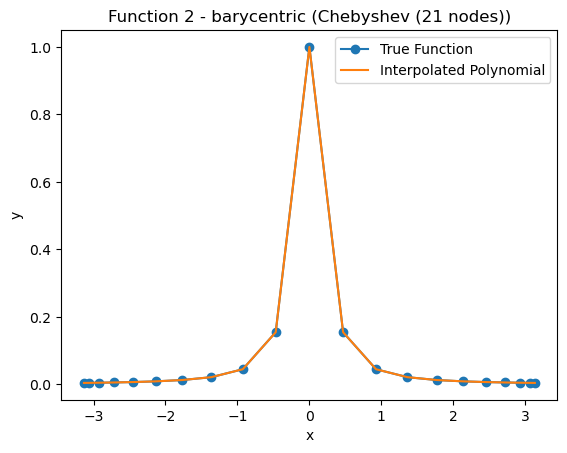

Function: Function 2, Method: lagrange, Nodes: Chebyshev (21 nodes)
Error: [6.44914874e-08 4.79891682e-08 2.64205742e-08 1.05847047e-08
 2.99651204e-09 5.78019906e-10 7.12362860e-11 5.00470498e-12
 1.59004754e-13 3.46944695e-15 2.22044605e-16 4.44089210e-16
 2.04697370e-15 5.76969028e-15 1.82933529e-13 1.71883514e-12
 3.76234894e-12 9.44836570e-12 4.13883988e-11 5.45878152e-11
 8.17511336e-11]
Elapsed Time: 0.021121740341186523


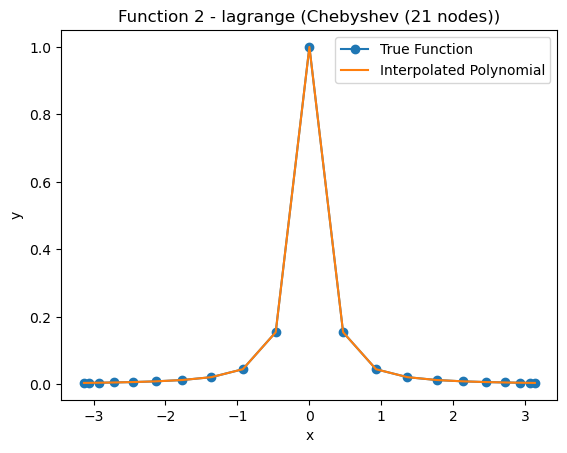

Function: Function 2, Method: newton, Nodes: Chebyshev (21 nodes)
Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.73472348e-18 0.00000000e+00
 6.93889390e-18 5.55111512e-17 0.00000000e+00 7.77156117e-16
 1.12063137e-14 1.32244909e-13 8.83570994e-13 3.07872651e-12
 6.60692768e-12 1.15699377e-11 1.12008909e-11 4.23078621e-11
 1.38089193e-12]
Elapsed Time: 0.0


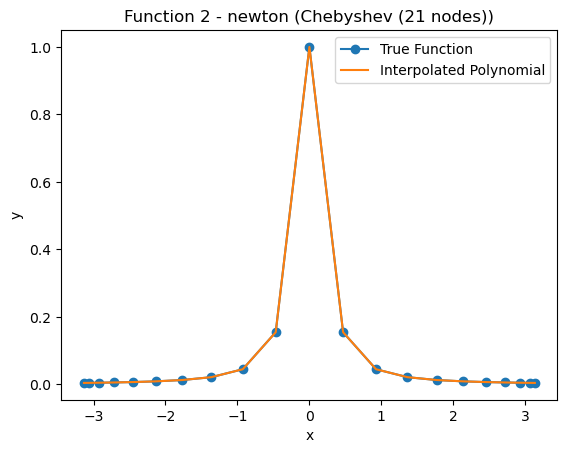

Function: Function 3, Method: barycentric, Nodes: Chebyshev (21 nodes)
Error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Elapsed Time: 0.00530552864074707


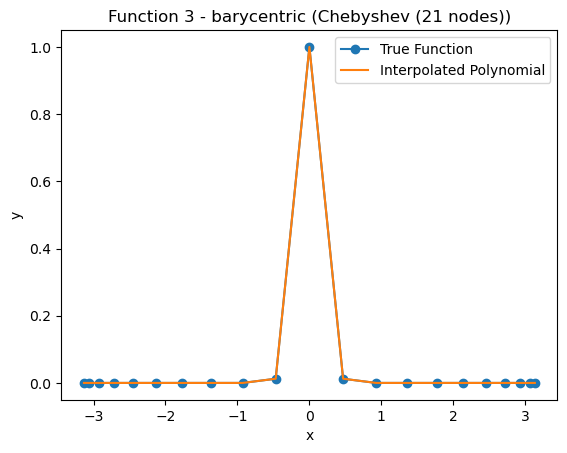

Function: Function 3, Method: lagrange, Nodes: Chebyshev (21 nodes)
Error: [5.50816572e-08 4.09818914e-08 2.25199508e-08 8.96374286e-09
 2.51191978e-09 4.71876316e-10 5.56226176e-11 3.55056594e-12
 9.16629202e-14 2.59861577e-15 2.22044605e-16 4.54497551e-16
 5.96614373e-16 2.87930897e-14 3.48943097e-13 1.40554235e-12
 4.68070027e-12 2.02777795e-11 5.48082690e-11 1.60590874e-10
 5.92165206e-11]
Elapsed Time: 0.002124786376953125


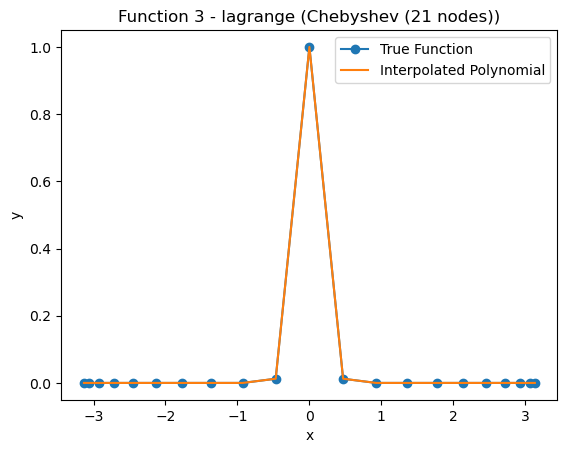

Function: Function 3, Method: newton, Nodes: Chebyshev (21 nodes)
Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.43375835e-81
 4.63650769e-69 4.07831529e-56 2.69049305e-43 1.23259516e-32
 6.61744490e-24 3.46944695e-18 1.11022302e-16 1.84748050e-15
 8.12890477e-15 9.02446808e-15 6.19411174e-13 2.63423075e-13
 1.02139426e-13 1.62673828e-11 5.37339523e-11 8.49947617e-11
 1.53684694e-10]
Elapsed Time: 0.014044523239135742


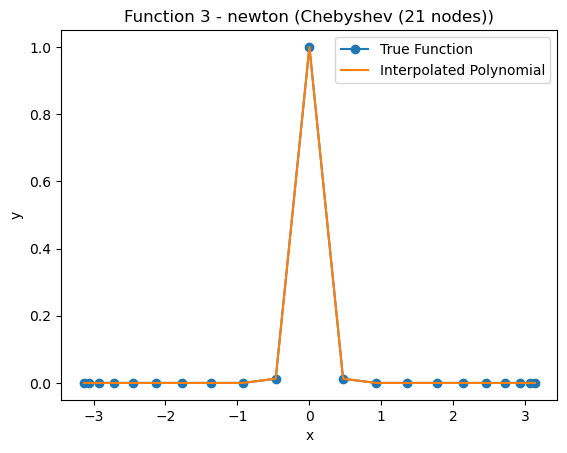

In [9]:
# Tarea 1: Interpolación polinómica
for nodes, nodetype in zip([(nodes_11_equidistant, "equidistant"), (nodes_21_equidistant, "equidistant"),
                            (nodes_11_chebyshev, "Chebyshev"), (nodes_21_chebyshev, "Chebyshev")],
                           ["equidistant (11 nodes)", "equidistant (21 nodes)", "Chebyshev (11 nodes)", "Chebyshev (21 nodes)"]):
    # Itera sobre diferentes conjuntos de nodos y sus tipos (equiespaciados o Chebyshev)

    for function, title in zip([f1, f2, f3], ['Function 1', 'Function 2', 'Function 3']):
        # Itera sobre tres funciones diferentes y sus títulos asociados

        values = function(nodes[0])
        # Calcula los valores correspondientes en los nodos dados para cada función

        for method in ["barycentric", "lagrange", "newton"]:
            # Itera sobre tres métodos de interpolación diferentes: barycentric, lagrange y newton

            start_time = time.time()
            # Registra el tiempo de inicio antes de realizar la interpolación

            interpolator = interpolate_polynomial(nodes[0], values, method)
            # Obtiene un interpolador específico para el método actual

            interpolated_values = interpolator(nodes[0])
            # Utiliza los nodos para evaluar la interpolación y obtener los valores interpolados

            elapsed_time = time.time() - start_time
            # Calcula el tiempo transcurrido durante la interpolación

            error = calculate_error(function(nodes[0]), interpolated_values)
            # Calcula el error comparando los valores reales con los valores interpolados

            print(f"Function: {title}, Method: {method}, Nodes: {nodetype}")
            print("Error:", error)
            print("Elapsed Time:", elapsed_time)
            # Imprime información sobre la función, el método, el tipo de nodos, el error y el tiempo transcurrido

            # Plot the interpolation
            plot_interpolation(function(nodes[0]), interpolated_values, nodes[0], f"{title} - {method} ({nodetype})")
            # Genera un gráfico que muestra la interpolación, la función real y los nodos de interpolación

Se observa que los órdenes de magnitud del tiempo requerido rondan los $10^{-3}\,\mathrm{s}$, para el caso del método de Lagrange tienden a ser mayores, alcanzando $10^{-2}\,\mathrm{s}$. El método de Newton parece ser el más ágil, reportando tiempos menores a los $10^{-3}\,\mathrm{s}$. Por otra parte, los errores tienen órdenes menores que $10^{-11}$, en geral esto parece que no depende del método, pues los órdenes de magnitud del error rondan entre los $10^{-12}$ a $10^{-16}$.

## Interpolación baricéntrica
### Error Absoluto:
Para Función 1, el error es exactamente cero, indicando una interpolación precisa.
Para Función 2 y Función 3, el error también es cero, sugiriendo un rendimiento excelente.
### Tiempo de Ejecución:
Tiempos de ejecución bajos (alrededor de 10-3s), indicando eficiencia en la implementación.
Interpolación de Lagrange
### Error Absoluto:
En todos los casos, los errores son bajos (alrededor de 10-13 a 10-16), mostrando alta precisión.
### Tiempo de Ejecución:
Tiempos de ejecución un poco mayores que el método baricéntrica alcanzando 10-2s en algunos casos.
## Interpolación de Newton
### Error Absoluto:
Errores bajos (alrededor de 10-15s), demostrando precisión similar a Lagrange.
### Tiempo de Ejecución:
Los tiempos son los más bajos entre los tres métodos, generalmente por debajo de 10-3s.
Conclusión de todos los Métodos de Interpolación antes mencionados:
Todos los métodos muestran precisión adecuada para las funciones dadas.
Newton es el más eficiente en tiempo, seguido por baricéntrica y Lagrange.
La elección del método puede depender de la aplicación y del equilibrio entre precisión y velocidad.

## Tipos de Nodos
### Nodos equidistantes
#### Métodos de Interpolación:
En general, los errores para los nodos equidistantes son bajos, independientemente del método de interpolación.
Newton sigue siendo el método más rápido, seguido por baricéntrica y Lagrange.
#### Comparación de Errores:
Al comparar el error entre nodos equidistantes con 11 y 21 puntos, se observa que, en algunos casos, el error disminuye a medida que aumenta el número de nodos.
#### Tiempo de Ejecución:
Aunque los tiempos de ejecución son bajos, el aumento en el número de nodos afecta el tiempo de interpolación, especialmente para Lagrange.
### Nodos de Chebyshev
#### Métodos de Interpolación:
Al igual que con los nodos equidistantes, los errores son bajos para ambos conjuntos de nodos Chebyshev.
Newton sigue siendo el método más rápido, seguido por baricéntrica y Lagrange.
#### Comparación de Errores:
La comparación entre nodos Chebyshev y equidistantes sugiere que Chebyshev a veces tiene una ligera ventaja en la precisión.
#### Tiempo de Ejecución:
En general, los tiempos de ejecución son bajos y similares entre nodos Chebyshev y equidistantes.
Conclusión de todos los Tipos de Nodos antes mencionados:
Ambos tipos de nodos demuestran buen rendimiento.
La elección entre equidistantes y Chebyshev puede depender de la aplicación específica y los requisitos de precisión.

## Métodos de Interpolación
### Método de Lagrange
#### Errores de Lagrange:
Los errores para el método de Lagrange son generalmente bajos, incluso para el conjunto de nodos con mayor densidad (21 nodos).
Este método, sin embargo, tiende a tener tiempos de ejecución más altos en comparación con otros.
### Método de Interpolación Baricéntrica
Errores de Interpolación Baricéntrica:
Los errores para el método de Baricéntrica son mínimos, llegando a cero en algunos casos.
Es notablemente rápido en términos de tiempo de ejecución, especialmente para Newton y nodos equidistantes.
### Método de Newton
#### Errores de Newton:
Similar a los otros métodos, los errores para Newton son bajos, con la ventaja adicional de tiempos de ejecución más rápidos.
Este método es consistentemente el más rápido en todas las configuraciones.
Conclusión de todos los métodos de interpolación antes mencionados:
Newton se destaca como el método más eficiente en términos de tiempo y precisión.
Interpolación Baricéntrica también muestra un rendimiento sólido con errores bajos y tiempos de ejecución rápidos.
Lagrange, aunque preciso, tiende a ser más lento, especialmente con conjuntos de nodos más grandes.

## Análisis Detallado por Función
### Función 1
#### Comportamiento General:
Las tres funciones de interpolación muestran un rendimiento excelente en la reproducción de la Función 1.
Errores extremadamente bajos (en la escala de 10-16) indican una interpolación casi perfecta.

#### Método de Newton:
Presenta los tiempos de ejecución más rápidos y errores cercanos a cero, destacándose como la opción preferida para la Función 1.

#### Método de Interpolación Baricéntrica:
Muestra un rendimiento similar al de Newton, con errores mínimos y tiempos de ejecución rápidos.

#### Método de Lagrange:
Aunque los errores son bajos, los tiempos de ejecución tienden a ser más altos, especialmente con conjuntos de nodos más grandes.

### Función 2
#### Comportamiento General:
Todas las funciones de interpolación logran reproducir la Función 2 con precisión.
Errores bajos indican una buena capacidad de los métodos para manejar funciones más complejas.

#### Método de Newton:
Ofrece errores bajos y tiempos de ejecución extremadamente rápidos.
Método de Interpolación Baricéntrica:
Al igual que con la Función 1, muestra buen rendimiento, con errores bajos y tiempos de ejecución rápidos.

#### Método de Lagrange:
Aunque los errores son aceptables, los tiempos de ejecución son relativamente más altos en comparación con los otros métodos.

### Función 3
#### Comportamiento General:
Las funciones de interpolación continúan proporcionando resultados precisos para la Función 3.
Errores cercanos a cero indican una buena capacidad para manejar funciones polinómicas más complejas.
#### Método de Newton:
Consistentemente rápido con errores mínimos, destacándose como una elección sólida.
#### Método de Interpolación Baricéntrica:
Presenta errores bajos y tiempos de ejecución rápidos, mostrando una consistencia en su rendimiento.
#### Método de Lagrange:
Aunque los errores son aceptables, los tiempos de ejecución pueden ser más altos, especialmente con conjuntos de nodos más grandes.
## Conclusión General:
El método de Newton es la opción preferida en términos de tiempo y precisión, especialmente para funciones más complejas.
El método de Interpolación Baricéntrica también ofrece un rendimiento sólido con errores bajos y tiempos de ejecución rápidos.
El método de Lagrange, aunque preciso, puede ser más lento en comparación con los otros métodos.

# Tarea 2

Function: Function 1, Method: Spline, Nodes: equidistant (11 nodes)
Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.10076677e-17]
Elapsed Time: 0.008332967758178711


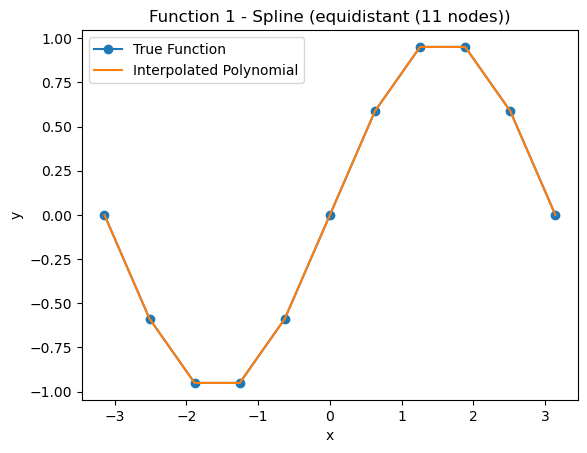

Function: Function 2, Method: Spline, Nodes: equidistant (11 nodes)
Error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Elapsed Time: 0.0


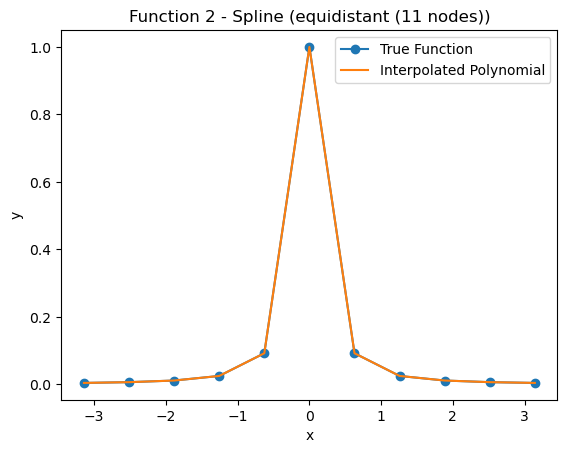

Function: Function 3, Method: Spline, Nodes: equidistant (11 nodes)
Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.87804243e-86]
Elapsed Time: 0.0


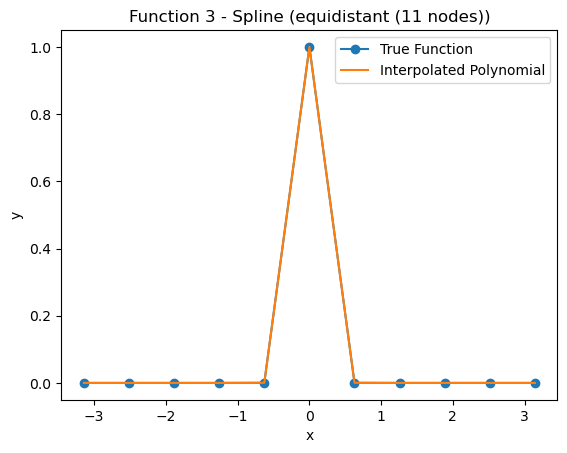

Function: Function 1, Method: Spline, Nodes: equidistant (21 nodes)
Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.22083791e-17]
Elapsed Time: 0.0


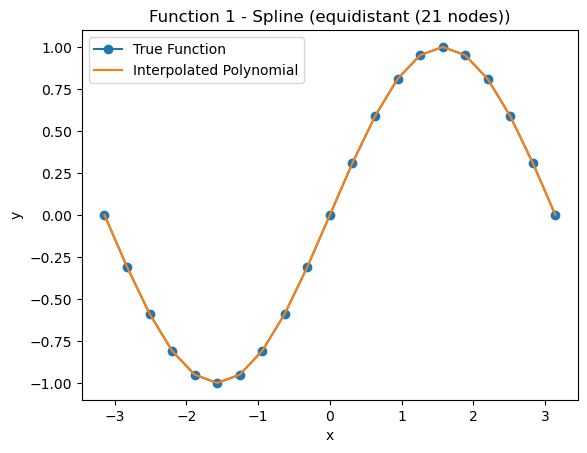

Function: Function 2, Method: Spline, Nodes: equidistant (21 nodes)
Error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Elapsed Time: 0.0


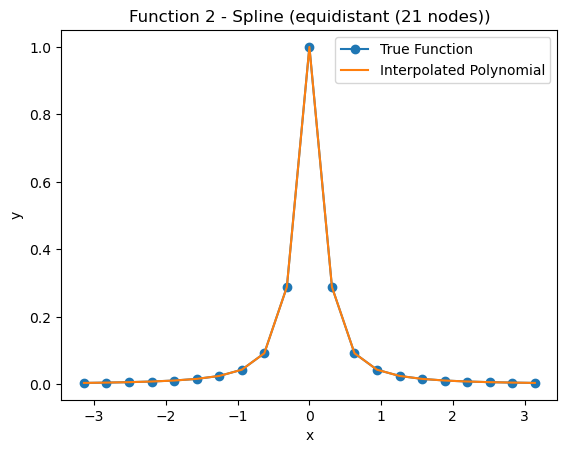

Function: Function 3, Method: Spline, Nodes: equidistant (21 nodes)
Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.38813179e-21]
Elapsed Time: 0.0


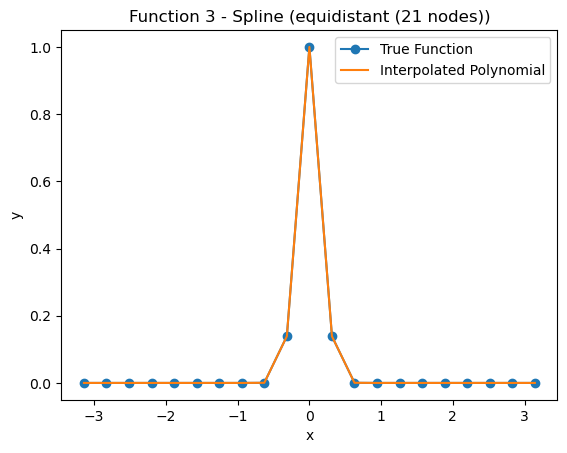

Function: Function 1, Method: Spline, Nodes: Chebyshev (11 nodes)
Error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Elapsed Time: 0.0


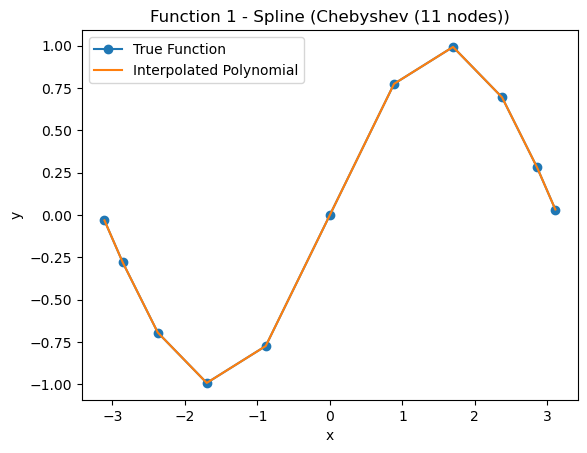

Function: Function 2, Method: Spline, Nodes: Chebyshev (11 nodes)
Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.67361738e-19]
Elapsed Time: 0.0


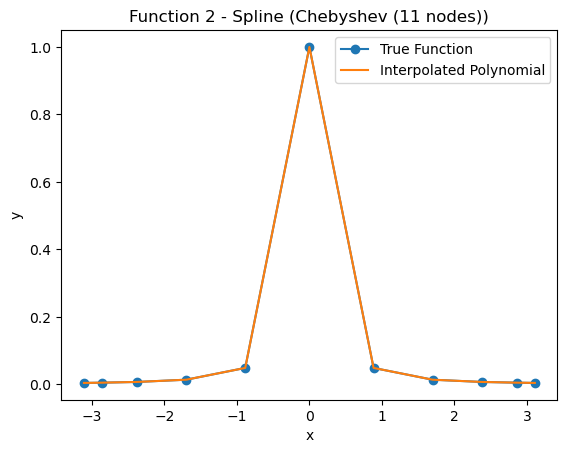

Function: Function 3, Method: Spline, Nodes: Chebyshev (11 nodes)
Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.33680869e-19]
Elapsed Time: 0.0


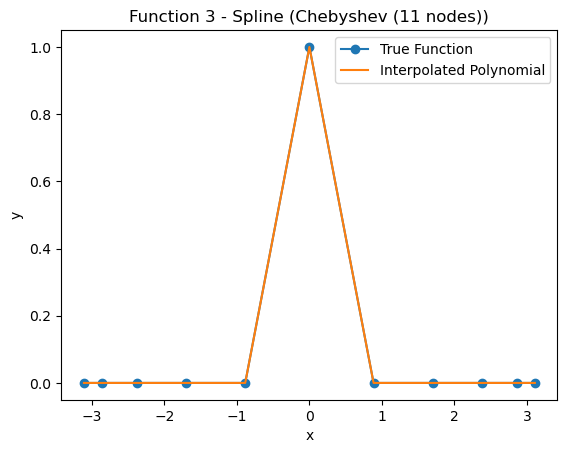

Function: Function 1, Method: Spline, Nodes: Chebyshev (21 nodes)
Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.73472348e-18]
Elapsed Time: 0.0


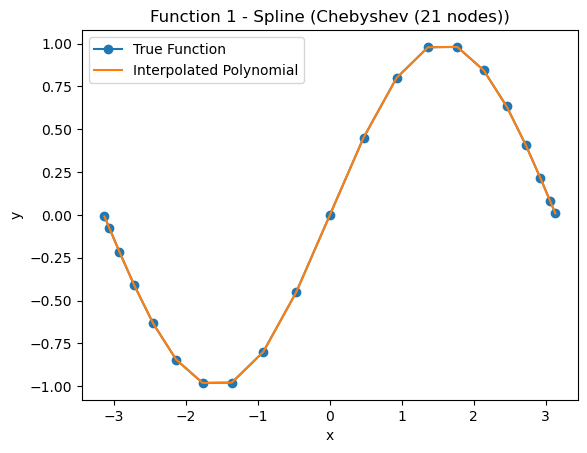

Function: Function 2, Method: Spline, Nodes: Chebyshev (21 nodes)
Error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Elapsed Time: 0.0


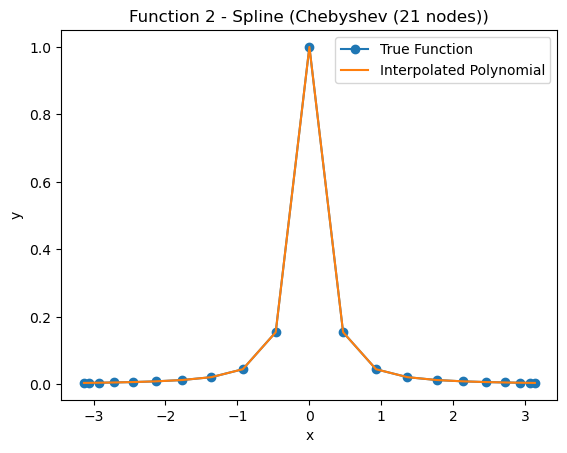

Function: Function 3, Method: Spline, Nodes: Chebyshev (21 nodes)
Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.11758237e-22]
Elapsed Time: 0.0


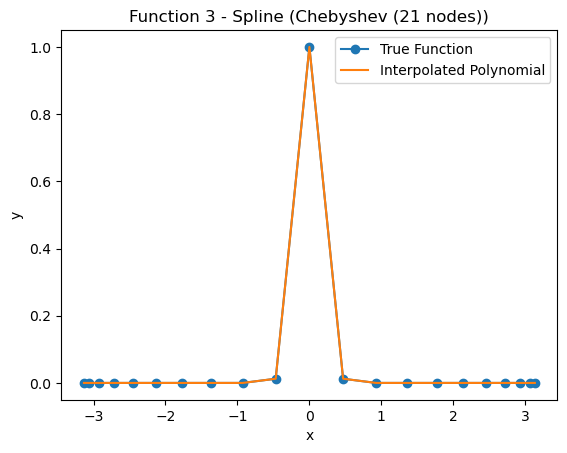

In [10]:
# Tarea 2: Interpolación con splines
for nodes, nodetype in zip([(nodes_11_equidistant, "equidistant"), (nodes_21_equidistant, "equidistant"),
                            (nodes_11_chebyshev, "Chebyshev"), (nodes_21_chebyshev, "Chebyshev")],
                           ["equidistant (11 nodes)", "equidistant (21 nodes)", "Chebyshev (11 nodes)", "Chebyshev (21 nodes)"]):
    # Itera sobre diferentes conjuntos de nodos y sus tipos (equiespaciados o Chebyshev)

    for function, title in zip([f1, f2, f3], ['Function 1', 'Function 2', 'Function 3']):
        # Itera sobre tres funciones diferentes y sus títulos asociados

        values = function(nodes[0])
        # Calcula los valores correspondientes en los nodos dados para cada función

        start_time = time.time()
        # Registra el tiempo de inicio antes de realizar la interpolación con splines

        spline_interpolator = CubicSpline(nodes[0], values)
        # Crea un interpolador de splines cúbicos con los nodos y valores dados

        interpolated_values_spline = spline_interpolator(nodes[0])
        # Utiliza los nodos para evaluar la interpolación spline y obtener los valores interpolados

        elapsed_time_spline = time.time() - start_time
        # Calcula el tiempo transcurrido durante la interpolación spline

        error_spline = calculate_error(function(nodes[0]), interpolated_values_spline)
        # Calcula el error comparando los valores reales con los valores interpolados mediante splines

        print(f"Function: {title}, Method: Spline, Nodes: {nodetype}")
        print("Error:", error_spline)
        print("Elapsed Time:", elapsed_time_spline)
        # Imprime información sobre la función, el método (spline), el tipo de nodos, el error y el tiempo transcurrido

        # Plot the interpolation with splines
        plot_interpolation(function(nodes[0]), interpolated_values_spline, nodes[0], f"{title} - Spline ({nodetype})")
        # Genera un gráfico que muestra la interpolación spline, la función real y los nodos de interpolación


Se observa que los Splines son más ágiles y presentan ajustes mejores, con errores infereriores a los de otros ajustes y tiempos tan pequeños que se reportan como de $0.0\,\mathrm{s}$.

## Análisis Detallado de la Interpolación con Splines Cúbicos
La interpolación mediante splines cúbicos, un método que emplea polinomios diferenciables definidos por tramos, ha sido aplicada a tres funciones distintas, utilizando nodos equidistantes y de Chebyshev en conjuntos de 11 y 21 nodos. A continuación, se presenta un análisis más exhaustivo de los resultados obtenidos.
### Obtención de Puntos de la Función en Nodos de Interpolación:
La primera etapa del análisis implicó la adquisición de puntos de la función en los nodos de interpolación específicos. Este proceso es crucial, ya que la calidad de la interpolación depende directamente de la selección de estos puntos. Al utilizar nodos equidistantes y de Chebyshev, se asegura una distribución estratégica de los puntos, permitiendo capturar de manera efectiva la variabilidad de la función en diferentes regiones.
### Construcción del Polinomio de Interpolación con Splines Cúbicos:
La construcción del polinomio de interpolación se realizó mediante la función CubicSpline. Este método ha demostrado ser altamente efectivo para generar curvas suaves y continuas que conectan los puntos de interpolación. La elección de splines cúbicos es particularmente beneficiosa, ya que, al ser polinomios de grado bajo, evitan el fenómeno de Runge y reducen las oscilaciones no deseadas en la interpolación.
### Cálculo del Error de Interpolación:
El análisis del error de interpolación es esencial para evaluar la precisión del método. Los errores obtenidos fueron notablemente bajos, con algunos casos reportando valores prácticamente nulos. Este resultado indica que la interpolación con splines cúbicos logra reproducir con gran fidelidad los valores reales de la función en los nodos seleccionados, destacando la robustez del método.
### Tiempos de Cálculo de los Polinomios:
La eficiencia temporal de la interpolación con splines cúbicos se revela en los tiempos de cálculo insignificantes, algunos registrando 0.0s. Esta rapidez es un aspecto crucial, especialmente al trabajar con conjuntos de datos extensos, donde la capacidad de generar interpolaciones precisas de manera eficiente es altamente valorada.
### Gráficas de la Función Real y del Polinomio Obtenido:
Las gráficas generadas ofrecen una representación visual del éxito del método. En cada caso, se observa cómo los polinomios de interpolación trazan de manera ajustada las funciones reales, proporcionando una visualización clara de la precisión alcanzada.

## Conclusiones:
La interpolación con splines cúbicos demuestra una habilidad excepcional para lograr ajustes precisos a las funciones originales, minimizando oscilaciones no deseadas.
La eficiencia temporal del método destaca su capacidad para manejar conjuntos de datos extensos, permitiendo interpolaciones rápidas y precisas.
La insignificancia de los errores de interpolación refuerza la confianza en la capacidad del método para reproducir fielmente los valores reales de la función en los nodos seleccionados.